# Models Training 5
In this notebook we are exploring Neural Networks

## Imports

In [50]:
!pip install -q Unidecode

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


# import custom helper module
import importlib
import helpers
importlib.reload(helpers)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


<module 'helpers' from '/content/helpers.py'>

## Load dataset

In [52]:
X_train, X_val, y_train, y_val = helpers.load_dataset("training_data_clean.csv", clean=False, force_reload=True)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


No pickle file found. Loading and cleaning dataset.


((27321,), (6831,), (27321,), (6831,))

## Vectorize dataset using Tfid

In [53]:
# vectorize data using tfidf
# max_feat mandatory, or input features too large, hence not using helper method here

def vectorize_tfidf(X_train, X_test=None):

    ngrange = (1, 3)
    max_feat = 10000  # mandatory

    # Initialise Tfidf vectorizer
    tfidf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=ngrange, max_features=max_feat)

    # fit vectorizer on train data, then apply it to test data
    X_train_vect = tfidf_vectorizer.fit_transform(X_train).toarray()

    if X_test is not None:
        X_test_vect = tfidf_vectorizer.transform(X_test).toarray()
        return X_train_vect, X_test_vect

    return X_train_vect

X_train_vec, X_val_vec = vectorize_tfidf(X_train, X_val)
X_train_vec.shape, X_val_vec.shape

((27321, 10000), (6831, 10000))

## Train a simple NN with Dense layers

In [54]:
# Create a fully connected model (FFNN) with Dense layers
model = Sequential()

# Add Dense layers
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_vec.shape[1],)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_vec, y_train, epochs=10, batch_size=16, validation_data=(X_val_vec, y_val))

# Evaluate the model
score = model.evaluate(X_val_vec, y_val)
print(f"Validation Accuracy: {score[1]:.4f}")

# Predict classes (binary 0/1) for validation set
y_val_pred_probs = model.predict(X_val_vec)
y_val_pred = (y_val_pred_probs > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_val, y_val_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_val, y_val_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_val, y_val_pred)
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6264 - loss: 0.7877 - val_accuracy: 0.9264 - val_loss: 0.2969
Epoch 2/10
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8640 - loss: 0.3961 - val_accuracy: 0.9412 - val_loss: 0.2302
Epoch 3/10
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9089 - loss: 0.3087 - val_accuracy: 0.9452 - val_loss: 0.2075
Epoch 4/10
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9335 - loss: 0.2487 - val_accuracy: 0.9480 - val_loss: 0.1961
Epoch 5/10
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9414 - loss: 0.2251 - val_accuracy: 0.9466 - val_loss: 0.1890
Epoch 6/10
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9511 - loss: 0.1962 - val_accuracy: 0.9469 - val_loss: 0.1877
Epoch 7/10
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9560 - loss: 0.1806 - val_accuracy: 0.9473 - val_loss: 0.1887
Epoch 8/10
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9560 - loss: 0.1767 -

## Visualise metrics

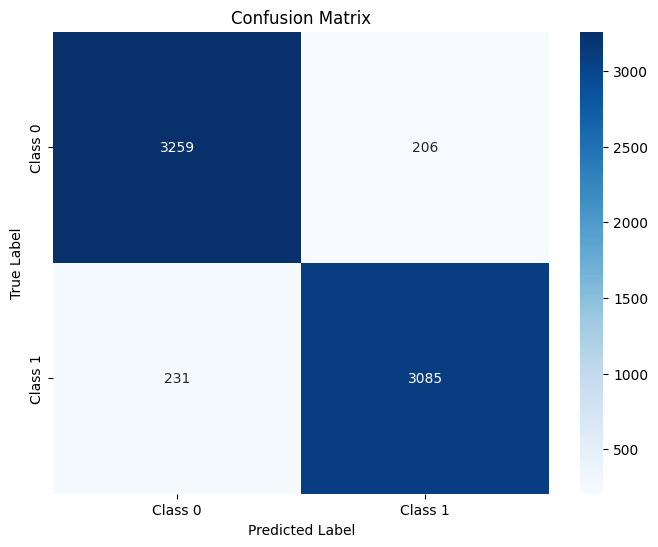

In [34]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

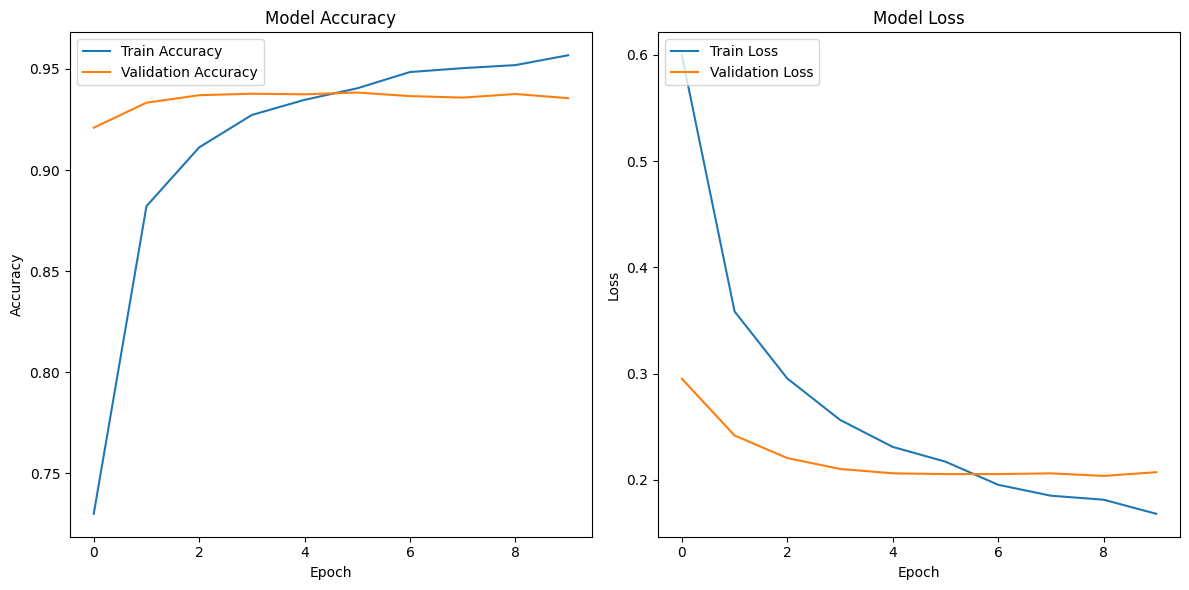

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()